<a href="https://colab.research.google.com/github/alifele/Machine_learning/blob/master/MachineLearningBook/Chapter10/Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

#Importing data


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, Y_train_full),(X_test, Y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [0]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = Y_train_full[:5000], Y_train_full[5000:]


Pullover


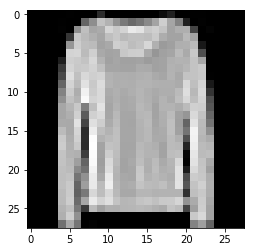

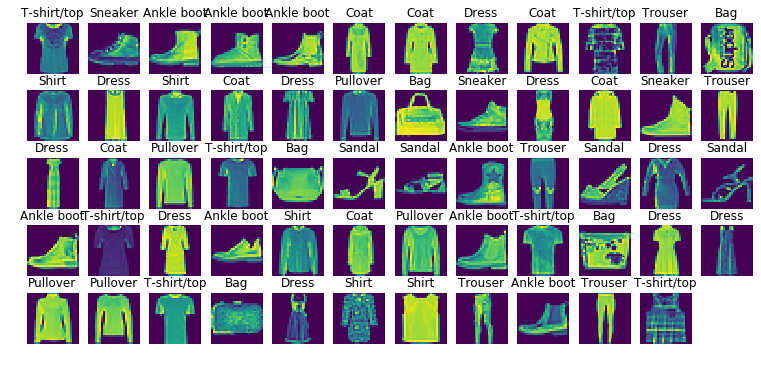

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names[y_train[43]])
plt.imshow(X_train[43], cmap='gray')
fig = plt.figure(figsize=(13,6))
for i in range(1,60):
  ax = fig.add_subplot(5,12,i, title=class_names[y_train[i]])
  ax.axis('off')
  ax.imshow(X_train[i])
  

#Creating the Model Using the Sequential API

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


also we can do the same as following:

```
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28,28])
        keras.layers.Dense(300, activation='relu')
        keras.layers.Dense(100, activation='relu')
        keras.layers.Dense(10, activation='softmax')
])
```

#Summary and picture of the network
you can find the picture in 'files' section of this notebook

In [7]:
model.summary()
keras.utils.plot_model(model, to_file='model.png')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


#Accessing Layers

In [8]:
model.layers

In [9]:
print(model.layers[2].name)

dense_1


In [10]:
w,b = model.layers[1].get_weights()
print(w)

[[ 0.04549098  0.02604306  0.05755424 ... -0.03037556  0.02388194
   0.05870871]
 [-0.07055026  0.05187057  0.00095733 ... -0.05158117 -0.00736639
  -0.02330445]
 [ 0.06177638 -0.02481485  0.0488655  ... -0.02195673 -0.02892638
  -0.07139163]
 ...
 [-0.01359599  0.01105165  0.00474057 ... -0.01742187 -0.05454926
   0.02796048]
 [-0.01527247 -0.02415587  0.01365124 ...  0.01492912  0.03847142
  -0.05935132]
 [-0.02803078  0.03192712 -0.02764602 ...  0.04722801  0.00624548
   0.04614467]]


#Compiling the Model

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

#Training and Evaluationg the Model


In [12]:
history = model.fit(X_train, y_train, epochs=10,batch_size=890,
                   validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 2s 43us/sample - loss: 1.9546 - acc: 0.4572 - val_loss: 1.6071 - val_acc: 0.6238
Epoch 2/10
55000/55000 [==============================] - 2s 35us/sample - loss: 1.3896 - acc: 0.6395 - val_loss: 1.1817 - val_acc: 0.6732
Epoch 3/10
55000/55000 [==============================] - 2s 35us/sample - loss: 1.0863 - acc: 0.6722 - val_loss: 0.9756 - val_acc: 0.6970
Epoch 4/10
55000/55000 [==============================] - 2s 35us/sample - loss: 0.9344 - acc: 0.7024 - val_loss: 0.8652 - val_acc: 0.7234
Epoch 5/10
55000/55000 [==============================] - 2s 35us/sample - loss: 0.8470 - acc: 0.7279 - val_loss: 0.7981 - val_acc: 0.7492
Epoch 6/10
55000/55000 [==============================] - 2s 35us/sample - loss: 0.7889 - acc: 0.7487 - val_loss: 0.7499 - val_acc: 0.7600
Epoch 7/10
55000/55000 [==============================] - 2s 35us/sample - loss: 0.7461 - acc: 0.7627 - val_loss: 0.7

to assign weight to each class we can use
```
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
class_weights
```
class_weights will be a dictionary which we can pass it to the fit function 


In [13]:
print(X_train.shape, y_train.shape)
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
class_weights

(55000, 28, 28) (55000,)


array([0.99224247, 1.01028655, 1.0007278 , 1.00018185, 0.99782293,
       0.99872889, 0.99872889, 1.00218659, 0.99818512, 1.0010921 ])

#History object of ```fit()``` method



In [14]:
history.params

{'batch_size': 890,
 'do_validation': True,
 'epochs': 10,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc'],
 'samples': 55000,
 'steps': None,
 'verbose': 0}

In [15]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [16]:
print(history.history)

{'loss': [1.9545735246918419, 1.3896033505959944, 1.0863147548220375, 0.9344455534002998, 0.8469519454999404, 0.788896203994751, 0.7461235027529977, 0.7117118735096671, 0.6836651409539309, 0.6604246747710488], 'acc': [0.45723635, 0.63952726, 0.67218184, 0.7024, 0.72785455, 0.7486909, 0.7627091, 0.77434546, 0.78294545, 0.7898], 'val_loss': [1.6071423938274383, 1.1816852781772613, 0.9755624927282334, 0.8652110875844955, 0.79805388712883, 0.7499424606561661, 0.712663832783699, 0.6816567652225495, 0.6573121383190155, 0.6383448475599289], 'val_acc': [0.6238, 0.6732, 0.697, 0.7234, 0.7492, 0.76, 0.775, 0.784, 0.79, 0.79]}


#Learning Curves

(0, 1)

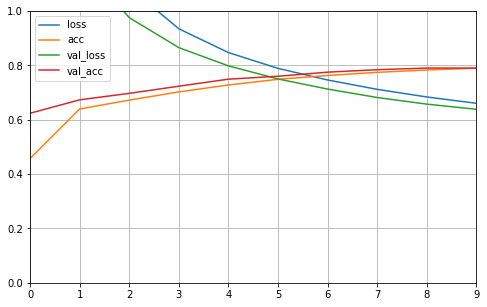

In [17]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

#Evaluatig Model

In [18]:
model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 1s 55us/sample - loss: 3.8976 - acc: 0.7517


[3.8975778289794922, 0.7517]

In [24]:
X_new = X_test[:40]
y_probability=model.predict(X_new)
y_probability

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.00

#Model predictions

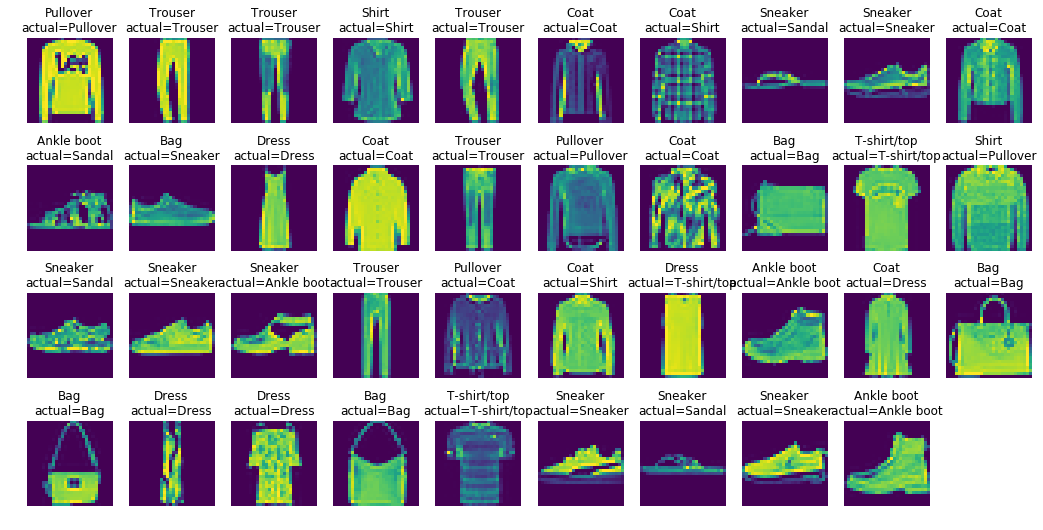

In [23]:
X_new = X_test[:40]
fig = plt.figure(figsize=(18,9))
y = np.argmax(model.predict(X_new),axis=1)
for i in range(1,40):
  ax = fig.add_subplot(4,10,i,title=class_names[y[i]]+'\nactual={}'.format(class_names[Y_test[i]]))
  ax.imshow(X_test[i])
  ax.axis('off')